<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/Team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
train.head(15)

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
5,1,2020-06-01 05,8010.576,16.9,3.4,93.0,0.0,0.0,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0
7,1,2020-06-01 07,8019.000,16.9,2.3,86.0,0.0,0.1,0.0,0.0
8,1,2020-06-01 08,8020.944,17.8,3.3,80.0,0.0,0.3,0.0,0.0
9,1,2020-06-01 09,8083.152,19.3,2.1,73.0,0.0,0.7,0.0,0.0


* num : 건물번호
* date_time : 시간

In [37]:
print(train.shape)  # 데이터의 행과 열 크기
print()
print(train.info())  # 행과 열의 구성 정보

(122400, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   num                 122400 non-null  int64  
 1   data_time           122400 non-null  object 
 2   usage               122400 non-null  float64
 3   temperature         122400 non-null  float64
 4   wind                122400 non-null  float64
 5   humidity            122400 non-null  float64
 6   precipitation       122400 non-null  float64
 7   sunshine            122400 non-null  float64
 8   operation_non_elec  122400 non-null  float64
 9   solar_power         122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB
None


In [30]:
train.isnull().sum()  # 결측치가 존재하는지 확인

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

### 건물군집화를 하는 이유

https://dacon.io/competitions/official/235736/codeshare/2643?page=1&dtype=recent

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [51]:
train.columns = ['num', 'data_time', 'usage', 'temperature', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar_power']

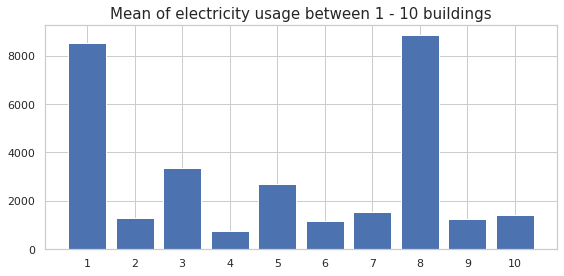

In [52]:
usage_summary = train.pivot_table(values = 'usage', index = 'num', aggfunc = np.mean).head(10)  # index 항목별 values의 aggfunc을 계산(num 항목별 usage의 평균을 계산)

plt.figure(figsize = (8, 4))
plt.bar(usage_summary.index, usage_summary.usage)
plt.title('Mean of electricity usage between 1 - 10 buildings', fontsize = 15)
plt.xticks(list(range(1,11)))
plt.tight_layout()
plt.show()

In [53]:
train_1 = train[train.num == 1]
building_1_corr = train_1.corr().iloc[1:7, 1:7]
building_1_corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,usage,temperature,wind,humidity,precipitation,sunshine
usage,1.00,0.64,0.06,-0.01,0.00,0.06
temperature,0.64,1.00,0.14,-0.53,-0.11,0.50
wind,0.06,0.14,1.00,-0.12,0.19,0.16
humidity,-0.01,-0.53,-0.12,1.00,0.27,-0.64
precipitation,0.00,-0.11,0.19,0.27,1.00,-0.11
sunshine,0.06,0.50,0.16,-0.64,-0.11,1.00


* 상관분석  
https://blog.naver.com/wtracer/221738979637

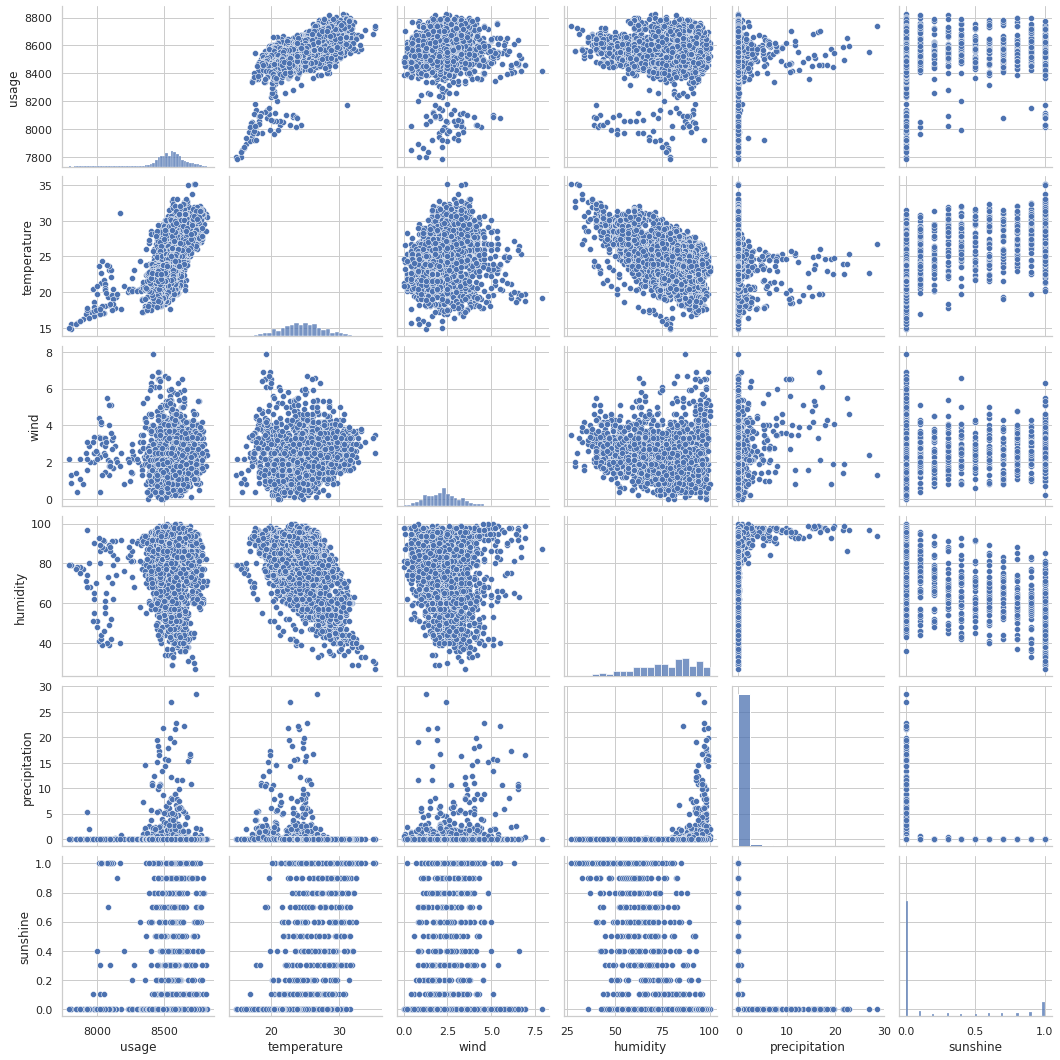

In [54]:
import seaborn as sns

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(train_1[['usage', 'temperature', 'wind', 'humidity', 'precipitation', 'sunshine']], height = 2.5)
plt.show()

* 상관분석 시각화  
https://blog.naver.com/sjy5448/222293781089

In [35]:
train.loc[:, train.columns[2:-2]].describe().T.loc[:, ['mean', 'std', 'min', 'max']]

,mean,std,min,max
usage,2324.830866,2058.999326,0.0,17739.225
temperature,24.251713,3.407902,11.1,36.300
wind,2.151641,1.514475,0.0,20.100
humidity,80.169848,15.525862,19.0,100.000
precipitation,0.514989,2.624505,0.0,81.500
sunshine,0.213533,0.370517,0.0,1.000
